## GAN

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras.models import Sequential

In [2]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
(x_train,y_train),(x_test,y_test) = load_data()

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
#it's a multiclass classification problem.y has 10 output options.

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model #to visualize
import numpy as np

In [4]:
from tensorflow.keras.optimizers import Adam


In [5]:
def dicriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))  #64 neurons , 3*3 filter size
    model.add(LeakyReLU(alpha=0.2))  #upar waale layer ka activation fn. Alag se line likh diye hai

    #Image ko chota karne jaa rhe hai humlog . Downsampling
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten()) #Converts the final feature map into a 1D vector.
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid')) #output layer

    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.002, beta_1=0.5),metrics=['accuracy'])
    return model


In [6]:
model = dicriminator()
model.summary()

C:\Users\Reyan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Reyan\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Loading real data and preprocessing it.
def load_real_sample():
    (x_train,_),(_,_) = load_data()
    x = x_train.astype('float32')
    x = (x_train-127.5)/127.5
    return x

In [12]:
x=load_real_sample()
x.shape

(50000, 32, 32, 3)

In [13]:
x[0]

array([[[-0.5372549 , -0.51372549, -0.50588235],
        [-0.6627451 , -0.63921569, -0.64705882],
        [-0.60784314, -0.62352941, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215686, -0.01960784, -0.2       ],
        [ 0.16078431, -0.02745098, -0.19215686]],

       [[-0.8745098 , -0.84313725, -0.84313725],
        [-1.        , -1.        , -1.        ],
        [-0.85882353, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980392, -0.56862745],
        [-0.06666667, -0.34901961, -0.60784314],
        [-0.04313725, -0.31764706, -0.55294118]],

       [[-0.80392157, -0.81176471, -0.83529412],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.61568627, -0.78823529, -0.9372549 ],
        ...,
        [-0.0745098 , -0.34117647, -0.60784314],
        [-0.05882353, -0.34117647, -0.60784314],
        [-0.14509804, -0.42745098, -0.67058824]],

       ...,

       [[ 0.63137255,  0.33333333, -0.24705882],
        [ 0

In [12]:
x.shape

(50000, 32, 32, 3)

In [13]:
#we will not pass this 50,000 data to a discriminator at ones . rather we will decide a batch size and choose randomly from x and then pass it to discriminator for training

In [14]:
x.shape[0]

50000

In [7]:
def generate_real_sample(dataset,sample):
    j = np.random.randint(0,dataset.shape[0] , sample) 
    x = dataset[j]
    y = np.ones((sample,1))  #this array will say ki our image is real...matlab output waala y bana diye hai.
    return x,y

In [15]:
x,y = generate_real_sample(x,64)
print(x.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [16]:
def generate_fake_samples(sample):
    x = np.random.rand(32*32*3*sample) #generates an array of random values between 0 and 1, with a shape determined by the total number of elements calculated by multiplying these dimensions.
    #basically we created a noise
    x = -1+x*2 #bringing it between [-1,1]
    x = x.reshape((sample,32,32,3))
    y = np.zeros((sample,1))
    return x,y

In [18]:
x,y = generate_fake_samples(64)
print(x.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9995213195587922..0.9998312729542824].


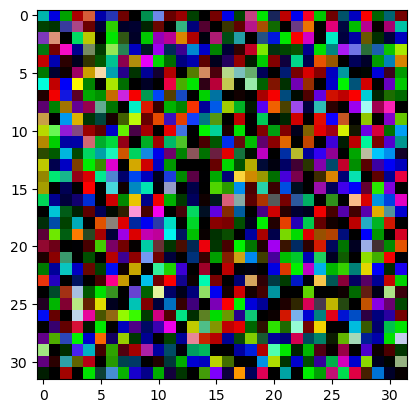

In [19]:
pyplot.imshow(x[0])

In [20]:
#above is a noise image

In [20]:
def train_discriminator(model,data,iteration=20,batch_size=128):
    half_batch = int(batch_size/2)
    for i in range(iteration):
        x_real,y_real =  generate_real_sample(data,half_batch)
        _,real_acc = model.train_on_batch(x_real,y_real)
        x_fake,y_fake =  generate_fake_samples(half_batch)
        _,fake_acc = model.train_on_batch(x_fake,y_fake)
        print(f"Iteration {i+1}/{iteration} - Real Accuracy: {real_acc}, Fake Accuracy: {fake_acc}")
    

In [21]:
model = dicriminator()
data = load_real_sample()
train_discriminator(model,data)

Iteration 1/20 - Real Accuracy: 0.53125, Fake Accuracy: 0.265625
Iteration 2/20 - Real Accuracy: 0.25, Fake Accuracy: 0.1875
Iteration 3/20 - Real Accuracy: 0.3218750059604645, Fake Accuracy: 0.375
Iteration 4/20 - Real Accuracy: 0.4486607015132904, Fake Accuracy: 0.48828125
Iteration 5/20 - Real Accuracy: 0.5434027910232544, Fake Accuracy: 0.589062511920929
Iteration 6/20 - Real Accuracy: 0.6235795617103577, Fake Accuracy: 0.6549479365348816
Iteration 7/20 - Real Accuracy: 0.6814903616905212, Fake Accuracy: 0.7042410969734192
Iteration 8/20 - Real Accuracy: 0.7239583134651184, Fake Accuracy: 0.7412109375
Iteration 9/20 - Real Accuracy: 0.7564338445663452, Fake Accuracy: 0.7699652910232544
Iteration 10/20 - Real Accuracy: 0.7820723652839661, Fake Accuracy: 0.79296875
Iteration 11/20 - Real Accuracy: 0.8028273582458496, Fake Accuracy: 0.8117897510528564
Iteration 12/20 - Real Accuracy: 0.819972813129425, Fake Accuracy: 0.8274739384651184
Iteration 13/20 - Real Accuracy: 0.83437502384185

In [8]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose

In [9]:
def generator(dim):
    model = Sequential()
    #choosing 4*4 image and then upsampling it
    nodes = 4*4*256
    model.add(Dense(nodes,input_dim=dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    #upsampling to 8*8- zooming out
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #upsamplinmg to 16*16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #upsampling to 32*32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    #output layer
    model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002, beta_1=0.5))
    return model
    

In [10]:
dim=100
model = generator(dim)
model.summary()

C:\Users\Reyan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
def generate_latent_point(dim,sample):
    x_input = np.random.randn(dim*sample)
    x_input = x_input.reshape(sample,dim)
    return x_input

In [27]:
a = generate_latent_point(100,64)
a.shape

(64, 100)

In [28]:
a[0]

array([ 0.08672417,  0.04364341,  2.27436725,  0.05197527,  0.44403262,
       -2.75748424,  0.04599362, -0.35973617,  0.56142342, -0.59021387,
       -0.28434668, -1.26755728, -0.12928811,  1.28388724, -0.87050026,
        0.7934164 , -1.39618502,  2.29216746,  0.27084202,  0.41203898,
        0.455561  , -1.56146537,  0.85220347,  1.37432644, -1.01035886,
       -0.654006  , -0.66925923,  1.49935045,  0.33298897,  0.40805399,
        0.23896082,  0.36366303, -0.03927061,  0.40965713,  0.15220128,
        0.78237553,  0.69648518,  1.07443177, -0.8377991 ,  0.82172177,
       -1.41237026,  0.26827526, -0.76421306, -1.83610554,  0.17893254,
        1.20629337, -0.94125726, -1.48431064, -0.6094823 ,  0.82489894,
        0.50000242,  0.26160139,  1.68423795, -0.50887033,  0.23477788,
       -0.30121676, -1.58002384, -0.2985231 , -0.97599516,  1.26739269,
        0.63692666,  1.12680841, -0.23315706, -1.40942886, -1.28897106,
       -0.17540476,  0.00699175, -0.50719662,  1.76210712,  0.18

In [12]:
def generate_fake_sample(g_model,dim,sample): # earlier we created fake sample function but the whole point of gan is that the fake sample should come from the generator
    x_input =  generate_latent_point(dim,sample) # we have created sample no. of images having length = dim (a 1d array)
    x = g_model.predict(x_input) #sending this data to generator model. it forms sample number of images of 32*32*3 
    y = np.zeros((sample,1)) #we are creating an output of all zeros 1D array to signify that it is a fake image 
    return x,y

In [30]:
dim =100
model = generator(dim)
sample=49
x,y = generate_fake_sample(model,dim,sample)
x=(x+1)/2.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


In [106]:
print(x.shape)
print(y.shape)

(49, 32, 32, 3)
(49, 1)


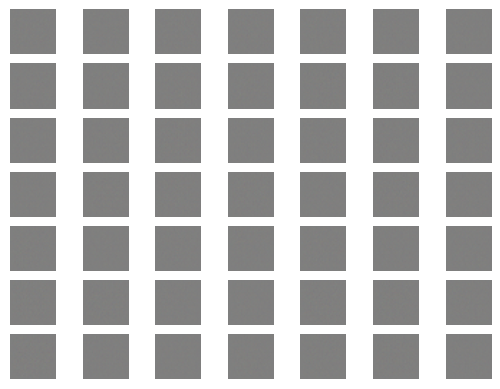

In [31]:
for i in range(49):
    pyplot.subplot(7,7,1+i)
    pyplot.axis('off')
    pyplot.imshow(x[i])
pyplot.show()

In [32]:
#our generator since it is not trained , is generating grey images

In [13]:
#we are combining the two models here. But we will only update the weight of generator. For that we are freezing the layers of discriminator
def gan(g_model,d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.002, beta_1=0.5))
    return model

In [14]:
dim = 100
d_model = dicriminator()
g_model = generator(dim)
gan_model = gan(g_model,d_model)
gan_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 1)              │       522,497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

In [15]:
def train(g_model,d_model,gan_model,dataset,dim,epoch=200,batch=128):
    batch_perepoch = int(dataset.shape[0]/batch)
    half_batch = int(batch/2)

    for i in range(epoch):
    
        for j in range(batch_perepoch):
            x_real,y_real = generate_real_sample(dataset,half_batch)
            d1_loss,_ = d_model.train_on_batch(x_real,y_real)
            
            x_fake,y_fake = generate_fake_sample(g_model,dim,half_batch)
            d2_loss,_ = d_model.train_on_batch(x_fake,y_fake)
            
            x_gan = generate_latent_point(dim,batch)
            y_gan = np.ones((batch,1))
            gan_loss,_ = gan_model.train_on_batch(x_gan,y_gan)
            
            print(f'>{i+1}, {j+1}, {batch_perepoch}, d1={d1_loss:.3f}, d2={d2_loss:.3f}, g={gan_loss:.3f}')


        if (i + 1) % 10 == 0:
            visualize_generated_samples(g_model, dim, i + 1)

        

In [16]:
def visualize_generated_samples(generator, latent_dim, epoch, n_samples=16):
    # Generate latent points
    latent_points = generate_latent_point(latent_dim, n_samples)
    # Generate fake samples
    generated_samples = generator.predict(latent_points)
    # Rescale pixel values to the range [0, 1] if needed
    generated_samples = (generated_samples + 1) / 2.0

    # Plot the generated samples
    plt.figure(figsize=(8, 8))
    for i in range(n_samples):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i, :, :, 0], cmap='gray')  # Adjust if dataset is RGB
        plt.axis('off')
    plt.suptitle(f'Generated Samples at Epoch {epoch}', fontsize=16)
    plt.tight_layout()
    plt.show()

In [21]:
dataset = load_real_sample()

In [22]:
train(g_model, d_model, gan_model, dataset, 100)

AttributeError: 'NoneType' object has no attribute 'update_state'

In [66]:
print(d_model.loss)
print(gan_model.loss)
print(g_model.loss)

binary_crossentropy
binary_crossentropy
binary_crossentropy


In [23]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [25]:
!pip install tensorflow==2.13.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.13.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.13.0
